In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
housing_df = pd.read_csv("housing.csv")

In [3]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
reduced_housing_df = housing_df.dropna()

In [5]:
reduced_housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
reduced_housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
features = housing_df.columns
features

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms','households','median_income']
X = reduced_housing_df[features]
print(X)
y = reduced_housing_df['median_house_value']
y

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       households  median_income  
0           126.

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [9]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=42)


# RandomForesrtRegressor

In [11]:
model = RandomForestRegressor()
model.fit(train_X,train_y)

RandomForestRegressor()

In [12]:
val_preds = model.predict(valid_X)
print(val_preds[:5])


[223953. 163297. 192868. 143698. 158255.]


In [13]:
mean_absolute_error(val_preds,valid_y)


32374.646168338633

In [14]:
mean_squared_error(val_preds,valid_y)

2483811260.6150165

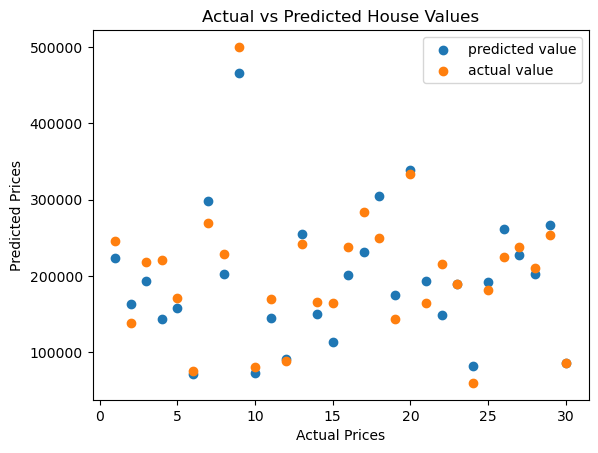

In [15]:
plt.scatter([i for i in range(1,31)],val_preds[:30])
plt.scatter([i for i in range(1,31)],valid_y[:30])
plt.legend(["predicted value","actual value"])
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Values")
plt.show()

# DecisionTreeRegressor

In [17]:
model2 = DecisionTreeRegressor()

In [18]:
model2.fit(train_X,train_y)

DecisionTreeRegressor()

In [19]:
preds_val = model.predict(valid_X)


In [20]:
mean_absolute_error(preds_val,valid_y)

32374.646168338633

In [21]:
mean_squared_error(preds_val,valid_y)

2483811260.6150165

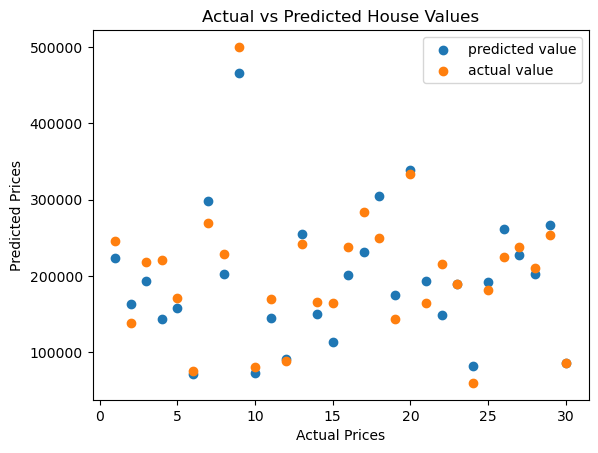

In [22]:
plt.scatter([i for i in range(1,31)],val_preds[:30])
plt.scatter([i for i in range(1,31)],valid_y[:30])
plt.legend(["predicted value","actual value"])
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Values")
plt.show()

# Linear Model

In [23]:
model3 = LinearRegression()

In [24]:
model3.fit(train_X,train_y)

LinearRegression()

In [25]:
preds_values = model3.predict(valid_X)

In [26]:
mean_squared_error(preds_values,valid_y)

5273120680.287857

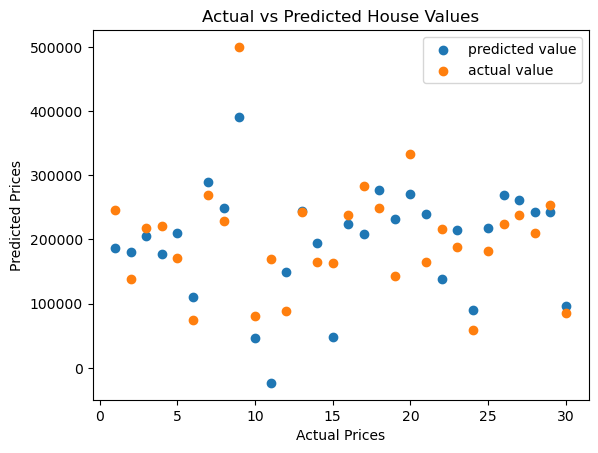

In [56]:
mean_absolute_error(preds_values,valid_y)
plt.scatter([i for i in range(1,31)],preds_values[:30])
plt.scatter([i for i in range(1,31)],valid_y[:30])
plt.legend(["predicted value","actual value"])
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Values")
plt.show()